In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = data2 = pd.read_csv("src/output.csv", sep = ";", parse_dates=True)
data.head()

,t_[(s)],VhubC_[m/s],Omega_[rpm],PSI_[deg],P_[kW],GenMom_[Nm],Fthr_[kN],Maero_[kNm],MSTor_[deg],Fyt0_[kN],...,Fz11h_[kN],My11h_[kNm],-Mx11h_[kNm],Mz11h_[kNm],PiTip1_[deg],Pi2_[deg],Fy21h_[kN],Fx21h_[kN],Fz21h_[kN],My21h_[kNm]
1970-01-01 00:00:00.000,0.00,4,10.5,212.0,6730.0,-9.307640e+05,1.521548e+06,3.915222e+05,233.13,1.586838e+06,...,1.993065e+06,1.096817e+06,1.994110e+06,2.440867e+06,308.26,147.30,1.303525e+06,1.630743e+06,-6.193780e+05,-6.060088e+05
1970-01-01 00:00:00.050,0.05,4,11.5,315.0,5756.0,1.677816e+06,-1.853383e+05,-4.888202e+04,76.38,1.249560e+06,...,9.623963e+05,2.470925e+06,2.470388e+06,8.331767e+05,20.25,345.31,1.642723e+06,2.060644e+06,2.241481e+06,2.186115e+06
1970-01-01 00:00:00.100,0.10,4,12.5,148.0,3460.0,2.484287e+06,1.441253e+06,1.969981e+06,262.45,1.891567e+05,...,-3.144342e+05,-7.333043e+05,2.351011e+05,-2.526879e+05,228.85,118.80,3.621024e+05,1.209632e+06,2.381082e+06,1.181164e+06
1970-01-01 00:00:00.150,0.15,4,13.5,120.0,4706.0,2.334306e+06,-4.605341e+05,1.490928e+05,351.38,-7.147050e+05,...,3.081277e+05,2.049608e+06,-7.631040e+05,1.026977e+06,75.54,353.85,5.609921e+05,1.873733e+06,6.930745e+05,-1.277405e+05
1970-01-01 00:00:00.200,0.20,4,14.5,322.0,1649.0,2.161154e+06,-8.951869e+05,-9.555203e+05,160.47,1.965480e+06,...,1.082561e+06,-5.747459e+05,2.153728e+06,7.914559e+05,206.85,176.40,1.798864e+06,2.187942e+06,9.080687e+05,1.079796e+06


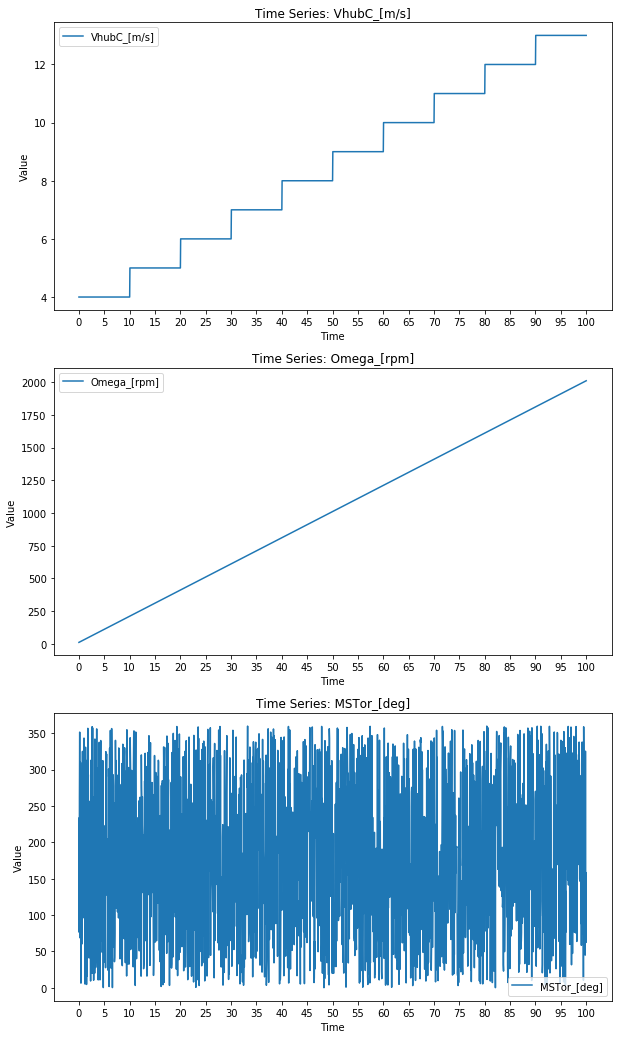

In [20]:
col_interest = ['VhubC_[m/s]', 'Omega_[rpm]', 'MSTor_[deg]']

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i, column in enumerate(col_interest):
    
    axes[i].plot(data['t_[(s)]'], data[column], label=column)
    axes[i].set_title(f'Time Series: {column}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    
    interval = 100  #Adjust this interval as needed
    
    x_ticks = data["t_[(s)]"][::100]
    axes[i].set_xticks(x_ticks)
    
    axes[i].legend()

plt.savefig('media/fig0X.eps', format='eps')

plt.show()

In [21]:
col = data['MSTor_[deg]']

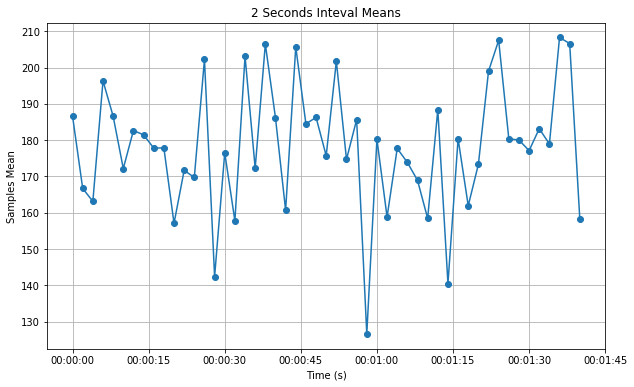

In [22]:
#1. Resampling:

plt.figure(figsize=(10, 6))

col_sampled = col.resample('2S').mean()

plt.plot(col_sampled, marker='o')
plt.title('2 Seconds Inteval Means')
plt.xlabel('Time (s)')
plt.ylabel('Samples Mean')
plt.grid(True)
plt.show()

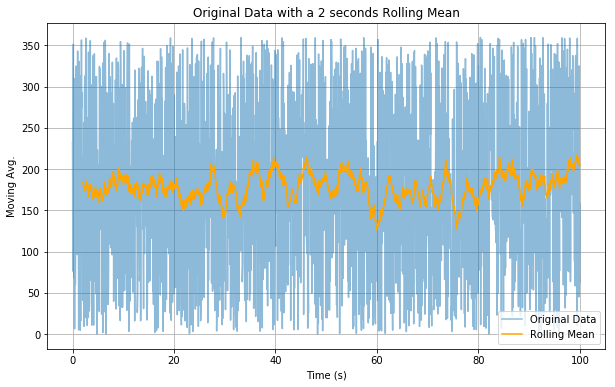

In [23]:
#2. Rolling mean:

rolling_mean = col.rolling(window=41).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['t_[(s)]'], col, label='Original Data', alpha=0.5)
plt.plot(data['t_[(s)]'], rolling_mean, label='Rolling Mean', color='orange')


plt.title('Original Data with a 2 seconds Rolling Mean')
plt.xlabel('Time (s)')
plt.ylabel('Moving Avg.')
plt.legend()
plt.grid(True)
plt.show()